# ML FINAL PROJECT

# Predicting Customer Campaign Acceptance and Customer Segmentation Using Machine Learning

In [30]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")


In [32]:
# Loading data
df = pd.read_excel('C:/Users/adivi/OneDrive/Documents/ML Final Project/marketing_campaign.xlsx')
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,3,0,0,0,0,0,0,3,11,0


In [33]:
import pandas as pd

# Assuming your dataframe is called 'df'
df = df.dropna()

# Verify that the null values are removed
print(df.isnull().sum())

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64


# Hyperparameter Tuning for Logistic Regression, Model Training and Evaluation for Logistic Regression (Problem 1)

In [34]:
# Using GridSearchCV or RandomizedSearchCV to find the best hyperparameters for Logistic Regression.
# Training the Logistic Regression model with the best hyperparameters.

In [35]:
# Select features based on the updated problem
X = df[['Recency', 'MntWines', 'MntFruits', 'Income', 'NumWebPurchases', 'NumStorePurchases', 
        'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']]  # Features

y = df['Response']  # Target variable for campaign response

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features for Logistic Regression (Random Forest does not require scaling)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Initialize the Logistic Regression model
logreg = LogisticRegression(random_state=42)

# Define hyperparameters for GridSearch
param_grid_logreg = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga'],
    'max_iter': [100, 200, 300]
}

# Apply GridSearchCV to find the best parameters
grid_logreg = GridSearchCV(estimator=logreg, param_grid=param_grid_logreg, cv=5, n_jobs=-1, scoring='accuracy')
grid_logreg.fit(X_train_scaled, y_train)

# Get the best model and parameters
best_logreg_model = grid_logreg.best_estimator_
print("Best Parameters for Logistic Regression:", grid_logreg.best_params_)

# Evaluate the tuned model
y_pred_logreg = best_logreg_model.predict(X_test_scaled)


Best Parameters for Logistic Regression: {'C': 10, 'max_iter': 100, 'solver': 'liblinear'}


# Hyperparameter Tuning for Random Forest, Model Training and Evaluation for Random Forest

In [37]:
# Using GridSearchCV or RandomizedSearchCV to find the best hyperparameters for Random Forest Classifier.
# Training the Random Forest Classifier model with the best hyperparameters.

In [38]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest Classifier
rf = RandomForestClassifier(random_state=42)

# Define hyperparameters for GridSearch
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
}

# Apply GridSearchCV to find the best parameters
grid_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=5, n_jobs=-1, scoring='accuracy')
grid_rf.fit(X_train, y_train)

# Get the best model and parameters
best_rf_model = grid_rf.best_estimator_
print("Best Parameters for Random Forest:", grid_rf.best_params_)

# Evaluate the tuned model
y_pred_rf = best_rf_model.predict(X_test)


Best Parameters for Random Forest: {'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 50}


Logistic Regression - Accuracy: 0.8783783783783784
Logistic Regression - Confusion Matrix:
[[369  13]
 [ 41  21]]
Logistic Regression - Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.97      0.93       382
           1       0.62      0.34      0.44        62

    accuracy                           0.88       444
   macro avg       0.76      0.65      0.68       444
weighted avg       0.86      0.88      0.86       444



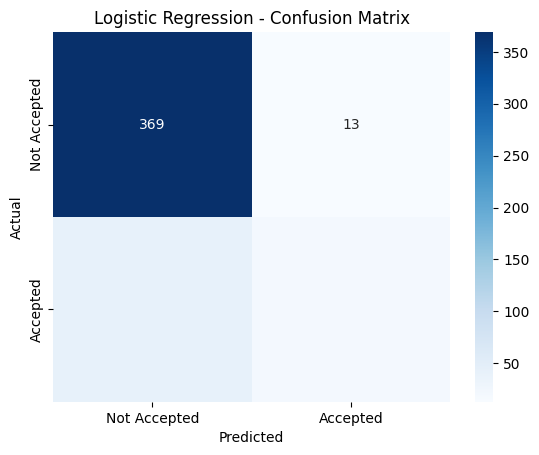

In [39]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Evaluate Logistic Regression Model
print("Logistic Regression - Accuracy:", accuracy_score(y_test, y_pred_logreg))
print("Logistic Regression - Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_logreg))
print("Logistic Regression - Classification Report:")
print(classification_report(y_test, y_pred_logreg))

# Plot Confusion Matrix
conf_matrix_logreg = confusion_matrix(y_test, y_pred_logreg)
sns.heatmap(conf_matrix_logreg, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Accepted', 'Accepted'], yticklabels=['Not Accepted', 'Accepted'])
plt.title('Logistic Regression - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

##### Problem 1: Predicting Customer Acceptance of Marketing Campaigns

##### Logistic Regression:
##### - Accuracy: 87.8% (good overall performance)
##### - Precision (Accepting): 62%, Recall (Accepting): 34%, F1-Score (Accepting): 44% 
#####   -> Model has difficulty identifying customers who will accept the campaign (low recall).
##### - Precision (Non-accepting): High, but biased towards predicting non-acceptors.

Random Forest - Accuracy: 0.8783783783783784
Random Forest - Confusion Matrix:
[[370  12]
 [ 42  20]]
Random Forest - Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.97      0.93       382
           1       0.62      0.32      0.43        62

    accuracy                           0.88       444
   macro avg       0.76      0.65      0.68       444
weighted avg       0.86      0.88      0.86       444



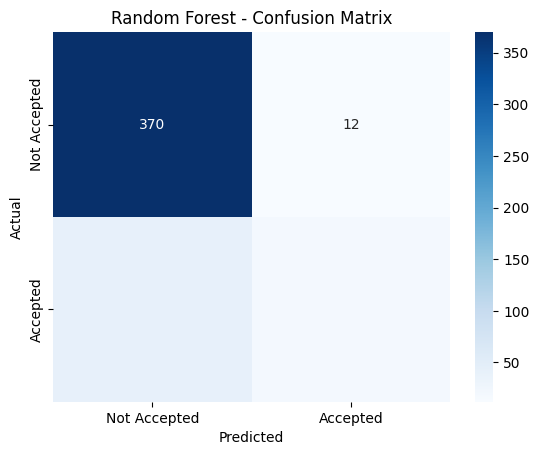

In [40]:
# Evaluate Random Forest Model
print("Random Forest - Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Random Forest - Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))
print("Random Forest - Classification Report:")
print(classification_report(y_test, y_pred_rf))

# Plot Confusion Matrix for Random Forest
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Accepted', 'Accepted'], yticklabels=['Not Accepted', 'Accepted'])
plt.title('Random Forest - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

##### Random Forest:
##### - Accuracy: 87.8% (same as Logistic Regression)
##### - Precision (Accepting): 62%, Recall (Accepting): 32%, F1-Score (Accepting): 43% 
#####   -> Similar issues with identifying acceptors, slightly lower recall than Logistic Regression.
##### - Weighted average precision is high, but both models struggle with detecting potential campaign acceptors.

Overall Performance: Both Logistic Regression and Random Forest achieved similar accuracy (87.8%), indicating good overall performance in predicting customer behavior. However, both models show weaknesses in identifying customers who will accept the campaign (low recall for the "1" class).

In [41]:
# Feature Importance for Random Forest

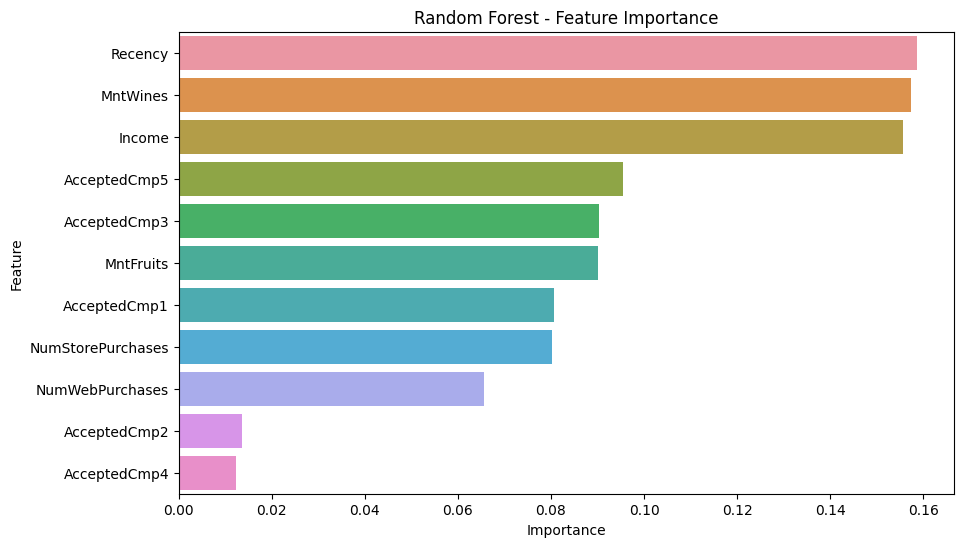

In [42]:
importances = best_rf_model.feature_importances_
features = X.columns
feature_importance = pd.DataFrame({'Feature': features, 'Importance': importances}).sort_values(by='Importance', ascending=False)

# Plot Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Random Forest - Feature Importance')
plt.show()


# Clustering for Customer Segmentation (Problem 2)

In [43]:
# Hyperparameter Tuning for K-Means
# Use GridSearchCV or silhouette score to determine the optimal number of clusters (k) for K-Means.

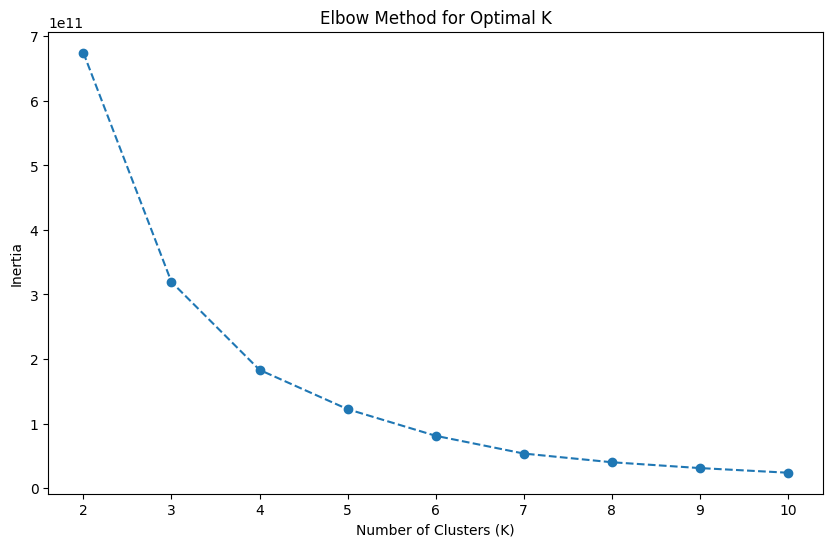

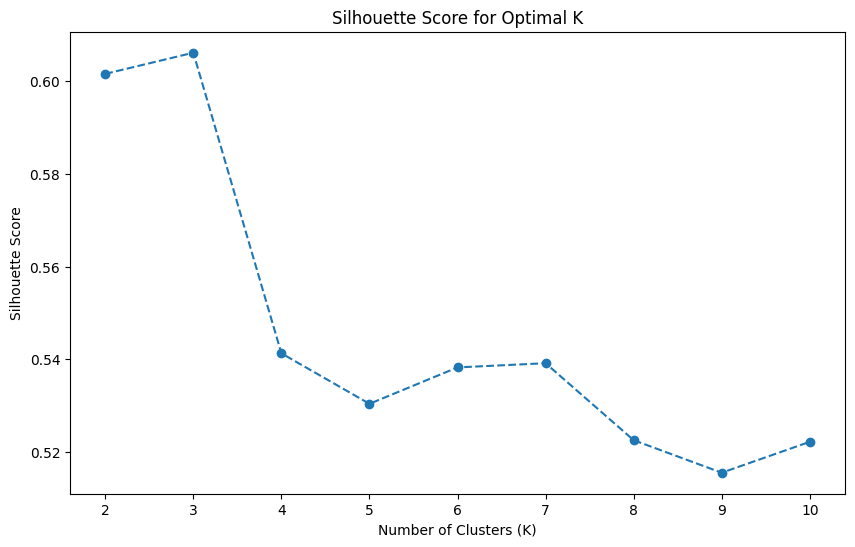

In [44]:
# Feature selection for Problem 2
X2 = df[['MntWines', 'MntMeatProducts', 'MntFruits', 'Income', 'NumWebPurchases', 'NumStorePurchases', 'Recency']]  # Selected features

# Elbow Method to choose the best 'K' (number of clusters)
inertia2 = []
sil_scores2 = []

for k in range(2, 11):  # Trying k from 2 to 10
    kmeans2 = KMeans(n_clusters=k, random_state=42)
    kmeans2.fit(X2)
    inertia2.append(kmeans2.inertia_)
    sil_scores2.append(silhouette_score(X2, kmeans2.labels_))

# Plotting Elbow Curve for 'K' vs Inertia
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), inertia2, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.show()

# Plotting Silhouette Score for each 'K'
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), sil_scores2, marker='o', linestyle='--')
plt.title('Silhouette Score for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.show()

# Best K is 2 based on previous discussions
optimal_k2 = 2
kmeans2 = KMeans(n_clusters=optimal_k2, random_state=42)
kmeans2.fit(X2)
df['KMeans_Cluster_P2'] = kmeans2.labels_

From the above elbow method we cannot analyse the k value. But from silhouette we clearly understand the k value is 3.

Gaussian Mixture Models (GMM) Hyperparameter Tuning:
For GMM, we need to tune the number of components (clusters) and the covariance type (whether clusters are spherical, diagonal, or full).

# K-Means Clustering

In [46]:
# Applying K-Means clustering and visualize the cluster distribution.

In [47]:
from sklearn.cluster import KMeans

# Select features for Problem 2
X2 = df[['MntWines', 'MntMeatProducts', 'MntFruits', 'Income', 'NumWebPurchases', 'NumStorePurchases', 'Recency']]  # Features for Problem 2

# Apply K-Means with k=3 (you mentioned k=3 for Problem 2)
kmeans2 = KMeans(n_clusters=3, random_state=42)
kmeans2.fit(X2)

# Assign the cluster labels to the dataframe
df['KMeans_Cluster_P2'] = kmeans2.labels_

# Show the first few rows of the dataframe with the cluster assignments
df[['KMeans_Cluster_P2', 'MntWines', 'MntMeatProducts', 'MntFruits', 'Income', 'NumWebPurchases', 'NumStorePurchases', 'Recency']].head()


,KMeans_Cluster_P2,MntWines,MntMeatProducts,MntFruits,Income,NumWebPurchases,NumStorePurchases,Recency
0,0,635,546,88,58138.0,8,4,58
1,1,11,6,1,46344.0,1,2,38
2,0,426,127,49,71613.0,8,10,26
3,1,11,20,4,26646.0,2,4,26
4,0,173,118,43,58293.0,5,6,94


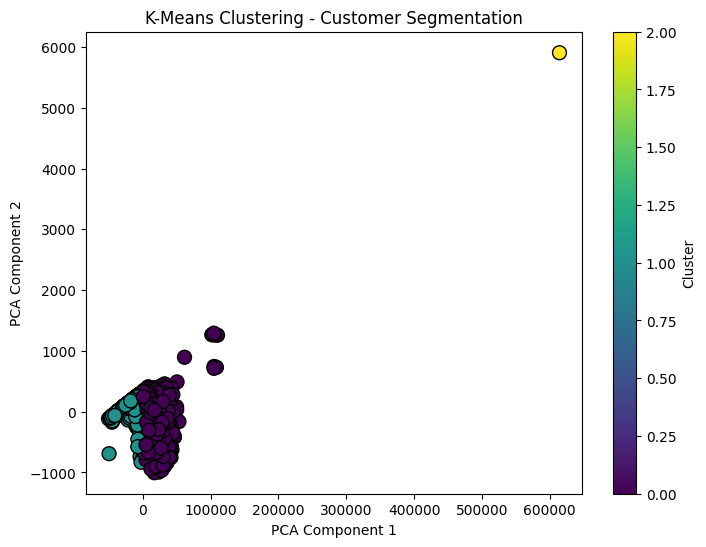

In [48]:
# Features for Problem 2
X2 = df[['MntWines', 'MntMeatProducts', 'MntFruits', 'Income', 'NumWebPurchases', 'NumStorePurchases', 'Recency']]

# Apply PCA to reduce the features to 2D for visualization
X2_pca = pca.fit_transform(X2)

# Plot K-Means clustering results
plt.figure(figsize=(8, 6))
plt.scatter(X2_pca[:, 0], X2_pca[:, 1], c=df['KMeans_Cluster_P2'], cmap='viridis', edgecolors='k', s=100)
plt.title('K-Means Clustering - Customer Segmentation')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()


##### Model Performance Analysis:
##### K-Means shows clearer segment boundaries:
##### - Distinct separation between clusters (purple, teal, yellow outlier)
##### - Better for identifying clear customer segments
##### - Easier to interpret and implement targeted strategies

# Gaussian Mixture Model (GMM) Clustering

In [49]:
# Applying GMM clustering and visualize the cluster distribution.
# Comparing GMM with K-Means for better customer segmentation.

In [50]:
from sklearn.mixture import GaussianMixture

# Applying GMM with n_components=3 
gmm2 = GaussianMixture(n_components=3, covariance_type='tied', random_state=42)
gmm2.fit(X2)

# Assign the GMM cluster labels to the dataframe
df['GMM_Cluster_P2'] = gmm2.predict(X2)

# Show the first few rows of the dataframe with the cluster assignments
df[['GMM_Cluster_P2', 'MntWines', 'MntMeatProducts', 'MntFruits', 'Income', 'NumWebPurchases', 'NumStorePurchases', 'Recency']].head()


,GMM_Cluster_P2,MntWines,MntMeatProducts,MntFruits,Income,NumWebPurchases,NumStorePurchases,Recency
0,1,635,546,88,58138.0,8,4,58
1,2,11,6,1,46344.0,1,2,38
2,0,426,127,49,71613.0,8,10,26
3,2,11,20,4,26646.0,2,4,26
4,2,173,118,43,58293.0,5,6,94


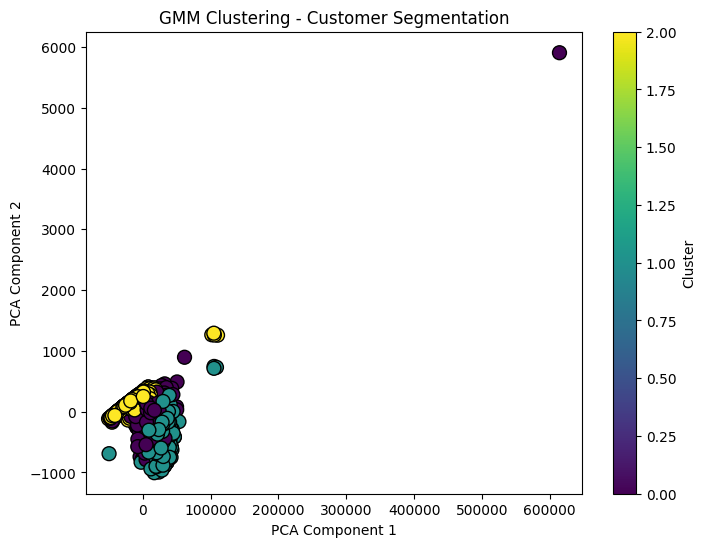

In [51]:
# Plot GMM clustering results for Problem 2
plt.figure(figsize=(8, 6))
plt.scatter(X2_pca[:, 0], X2_pca[:, 1], c=df['GMM_Cluster_P2'], cmap='viridis', edgecolors='k', s=100)
plt.title('GMM Clustering - Customer Segmentation')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()


##### GMM shows more realistic customer distribution:
##### - More yellow points in main cluster suggests transitional behaviors
##### - Overlapping segments may overcomplicate targeting
##### - Less distinct boundaries make strategy implementation challenging

Looking at this GMM clustering visualization compared to the K-Means result, there are some interesting differences in how customers are segmented:

Cluster Distribution:

There's a more balanced distribution between yellow and teal points, suggesting more nuanced segmentation
The outlier point at (600000, 6000) is now colored in purple, suggesting different cluster assignment than in K-Means

Key Differences from K-Means:

More yellow points are visible throughout the main cluster area
The boundaries between clusters appear more fluid and natural
There's better representation of uncertainty in customer segmentation

Marketing Strategy Implications:

The overlapping clusters suggest customers might share characteristics across segments
This could indicate opportunities for:

Cross-segment marketing campaigns
More personalized transition strategies between segments
Better understanding of customers who don't fit strictly into one category

Actionable Insights:

Consider creating hybrid marketing campaigns that target customers at cluster intersections
Use the probability scores from GMM to identify customers who might be more receptive to different types of marketing
Focus on the characteristics that define the overlap between segments to create more nuanced customer journey paths

# CONCLUSION

While Logistic Regression and Random Forest perform well in terms of overall accuracy, further efforts should be focused on improving recall for the "1" class, to better identify customers who are likely to accept the campaigns.

GMM offers a more flexible, probabilistic approach to customer segmentation compared to K-Means, with better handling of overlapping customer behaviors. This flexibility allows for more personalized marketing strategies and cross-segment targeting, which is crucial for a customer-centric marketing approach.

Moving forward, leveraging the probability scores from GMM, understanding the intersections between customer segments, and building hybrid marketing campaigns will help in optimizing marketing efforts and improving campaign success rates.